In [9]:
library(tidyverse)
library(plyr)
library(ggrepel)

In [2]:
code_dir <- getwd()
tool_dir <- unlist(strsplit(code_dir,"/"))
tool_dir <- head(tool_dir, length(tool_dir)-1)
tool_dir <- paste(c(tool_dir, "tools"), collapse="/")
source(file.path(tool_dir, "pl_functions.R"))
base_dir <- gsub("/plotting_codes", "", code_dir)
base_dir


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



── Column specification ────────────────────────────────────────────────────────
cols(
  gs_name = col_character(),
  type = col_character(),
  use = col_character(),
  plot_use = col_character(),
  abbr = col_character(),
  order = col_double()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  gs_name = col_character(),
  gene_symbol = col_character()
)




[1] "/media/pipkin/ROCKET-PRO/CD8_DEV_SC"

In [3]:
exp_name <- "5_Chd7_RNA_meta"

use.path <- file.path(base_dir, '9_Figures', exp_name, 
                      'volcano_plots')
dir.create(use.path, showWarnings = FALSE, recursive=TRUE)
setwd(use.path)

# Merged Ctrl (.1, .2, .3) versus RNAi


── Column specification ────────────────────────────────────────────────────────
cols(
  gene_name = col_character(),
  baseMean = col_double(),
  log2FoldChange = col_double(),
  lfcSE = col_double(),
  stat = col_double(),
  pvalue = col_double(),
  padj = col_double()
)




  side TE up Tstem
1   up     1    15
2   dn    15     4


Warning message:
“Removed 11842 rows containing missing values (geom_point).”
Warning message:
“Removed 86 rows containing missing values (geom_point).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”
Warning message:
“Removed 11842 rows containing missing values (geom_point).”
Warning message:
“Removed 86 rows containing missing values (geom_point).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”
Warning message:
“Removed 11842 rows containing missing values (geom_point).”
Warning message:
“Removed 86 rows containing missing values (geom_point).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”


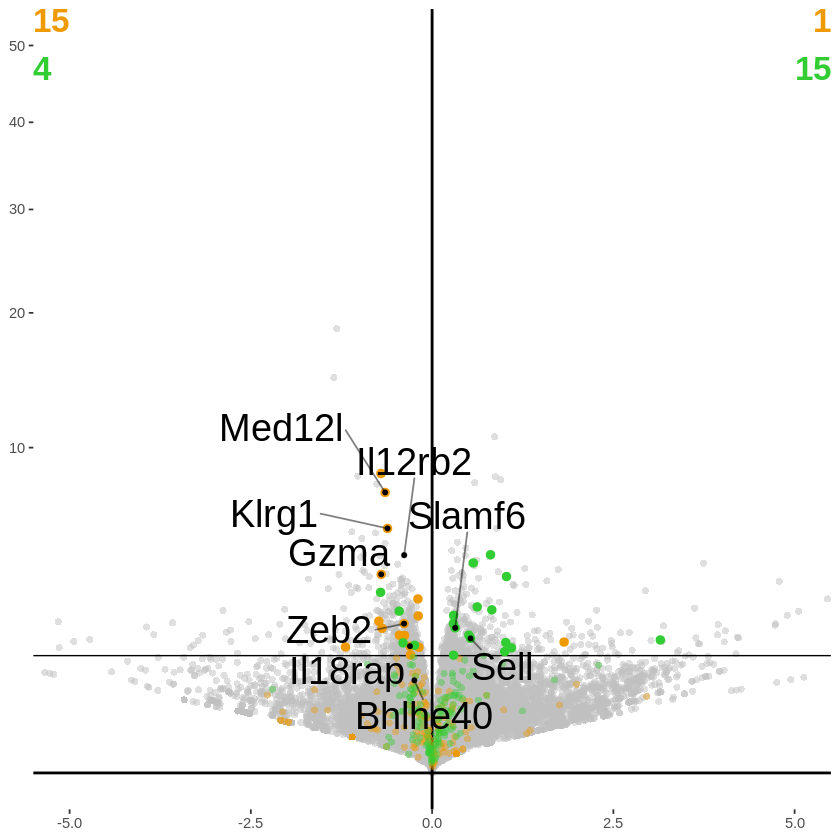

In [22]:
###----- Setup
de.dir <- '/media/pipkin/ROCKET-PRO/CD8_DEV_SC/5_Chd7_shRNA_RNA/1_DEseq2_merge_shChd7'
de.file <- file.path(de.dir, 'Chd7_vs_Ctrl_gn.csv')
outname.base <- "shChd7_vs_Ctrl"
use.genes <- c('Gzma','Il12rb2','Klrg1','Il18rap','Med12l','Zeb2','Bhlhe40','Slamf6','Sell')
log2fc.c <- 0
nlog10p.c <- 1.3
gs.vec <- c("TE up", "Tstem")
gs.col.vec <- c("orange2", "limegreen")
log2fc.range <- c(-5,5)
nlog10pval.max <- 50


de.df <- read_csv(de.file)
colnames(de.df) <- c('gene_name', 'baseMean', 'log2fc', 'lfcSE', 'stat', 'pvalue','padj','gene_name')
de.df$nlog10pval <- -log10(de.df$pvalue)

# Plot 
vol_plot_out <- volcano_plot_highlightGSEA(de.df, use.genes, gs.vec, gs.col.vec, 
                                           log2fc.c, nlog10p.c,log2fc.range, nlog10pval.max) # With label
vol_plot <- vol_plot_out$labeled_plot
vol_plot
ggsave(paste(outname.base, ".png", sep=""), vol_plot, device='png', width=10, height=10, units='cm')

# Save simplified plot
vol_plot <- vol_plot_out$plot
ggsave(paste(outname.base, "_nolabel.png", sep=""), vol_plot, device='png', width=10, height=10, units='cm')

# Save summary
write_csv(vol_plot_out$sum, paste(outname.base, "_sum.csv", sep=""))

# Chd7KO RNAseq

In [25]:
de.dir <- '/media/pipkin/ROCKET-PRO/CD8_DEV_SC/5_Chd7_KO_RNA/0_salmon_DE_out/2_DEseq/gene_name'


── Column specification ────────────────────────────────────────────────────────
cols(
  gene_name = col_character(),
  baseMean = col_double(),
  log2FoldChange = col_double(),
  lfcSE = col_double(),
  stat = col_double(),
  pvalue = col_double(),
  padj = col_double()
)




  side TE up
1   up     0
2   dn    19


Warning message:
“Removed 3792 rows containing missing values (geom_point).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 3792 rows containing missing values (geom_point).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 3792 rows containing missing values (geom_point).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


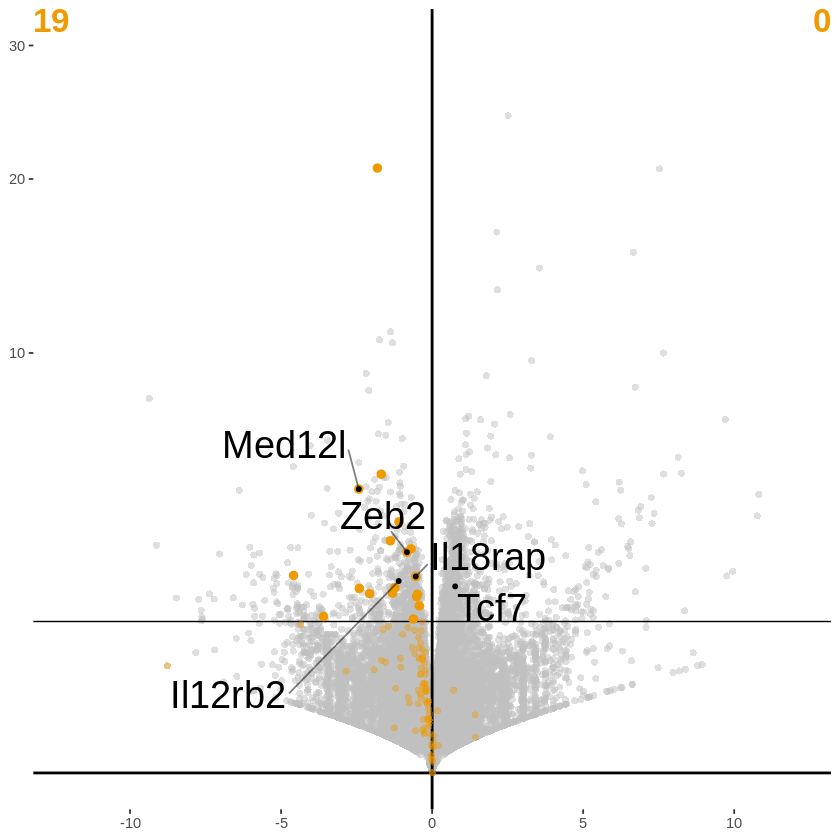

In [29]:
###----- Setup
de.file <- file.path(de.dir, 'KO_TE-WT_TE-Salmon_gn.csv')
outname.base <- "TE-Chd7KO_vs_TE-WT"
use.genes <- c('Zeb2','Med12l','Il18rap','Il12rb2','Tcf7')
log2fc.c <- 0
nlog10p.c <- 1.3
gs.vec <- c("TE up")
gs.col.vec <- c("orange2")
log2fc.range <- c(-12,12)
nlog10pval.max <- 30

de.df <- read_csv(de.file)
colnames(de.df) <- c('gene_name', 'baseMean', 'log2fc', 'lfcSE', 'stat', 'pvalue','padj','gene_name')
de.df$nlog10pval <- -log10(de.df$pvalue)

# Plot 
vol_plot_out <- volcano_plot_highlightGSEA(de.df, use.genes, gs.vec, gs.col.vec, 
                                           log2fc.c, nlog10p.c,log2fc.range, nlog10pval.max) # With label
vol_plot <- vol_plot_out$labeled_plot
vol_plot
ggsave(paste(outname.base, ".png", sep=""), vol_plot, device='png', width=10, height=10, units='cm')

# Save simplified plot
vol_plot <- vol_plot_out$plot
ggsave(paste(outname.base, "_nolabel.png", sep=""), vol_plot, device='png', width=10, height=10, units='cm')

# Save summary
write_csv(vol_plot_out$sum, paste(outname.base, "_sum.csv", sep=""))


── Column specification ────────────────────────────────────────────────────────
cols(
  gene_name = col_character(),
  baseMean = col_double(),
  log2FoldChange = col_double(),
  lfcSE = col_double(),
  stat = col_double(),
  pvalue = col_double(),
  padj = col_double()
)




  side MP up
1   up     0
2   dn    11


Warning message:
“Removed 3792 rows containing missing values (geom_point).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 3792 rows containing missing values (geom_point).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 3792 rows containing missing values (geom_point).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


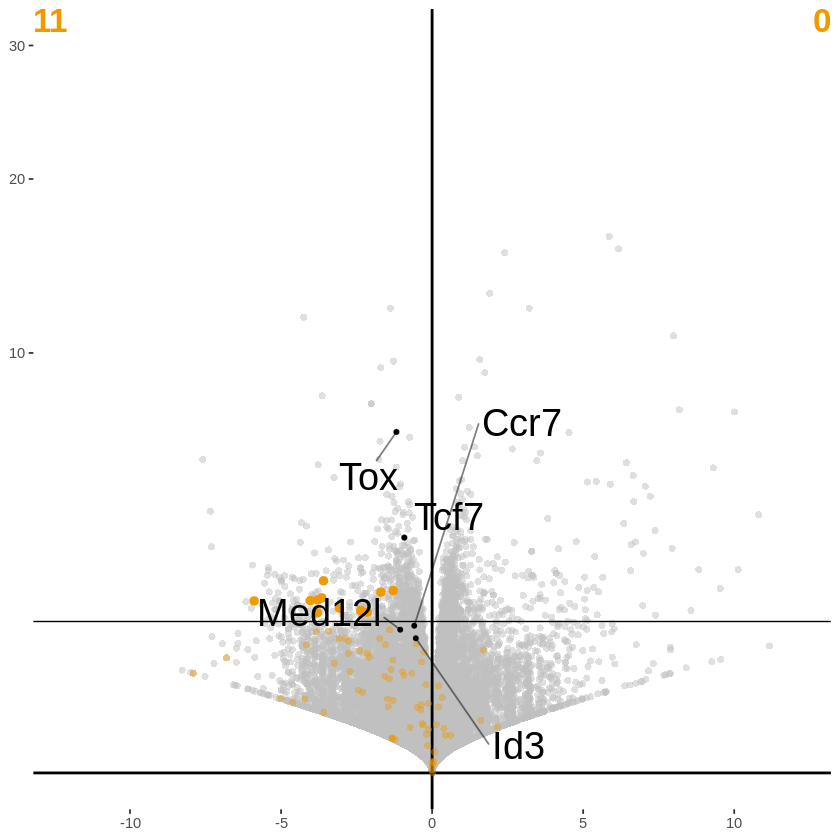

In [27]:
###----- Setup
de.file <- file.path(de.dir, 'KO_MP-WT_MP-Salmon_gn.csv')
outname.base <- "MP-Chd7KO_vs_MP-WT"
use.genes <- c('Med12l','Tcf7','Id3','Tox','Ccr7')
log2fc.c <- 0
nlog10p.c <- 1.3
gs.vec <- c("MP up")
gs.col.vec <- c("orange2")
log2fc.range <- c(-12,12)
nlog10pval.max <- 30

de.df <- read_csv(de.file)
colnames(de.df) <- c('gene_name', 'baseMean', 'log2fc', 'lfcSE', 'stat', 'pvalue','padj','gene_name')
de.df$nlog10pval <- -log10(de.df$pvalue)

# Plot 
vol_plot_out <- volcano_plot_highlightGSEA(de.df, use.genes, gs.vec, gs.col.vec, 
                                           log2fc.c, nlog10p.c,log2fc.range, nlog10pval.max) # With label
vol_plot <- vol_plot_out$labeled_plot
vol_plot
ggsave(paste(outname.base, ".png", sep=""), vol_plot, device='png', width=10, height=10, units='cm')

# Save simplified plot
vol_plot <- vol_plot_out$plot
ggsave(paste(outname.base, "_nolabel.png", sep=""), vol_plot, device='png', width=10, height=10, units='cm')

# Save summary
write_csv(vol_plot_out$sum, paste(outname.base, "_sum.csv", sep=""))


── Column specification ────────────────────────────────────────────────────────
cols(
  gene_name = col_character(),
  baseMean = col_double(),
  log2FoldChange = col_double(),
  lfcSE = col_double(),
  stat = col_double(),
  pvalue = col_double(),
  padj = col_double()
)




  side EE up
1   up     1
2   dn    15


Warning message:
“Removed 3792 rows containing missing values (geom_point).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 3792 rows containing missing values (geom_point).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 3792 rows containing missing values (geom_point).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


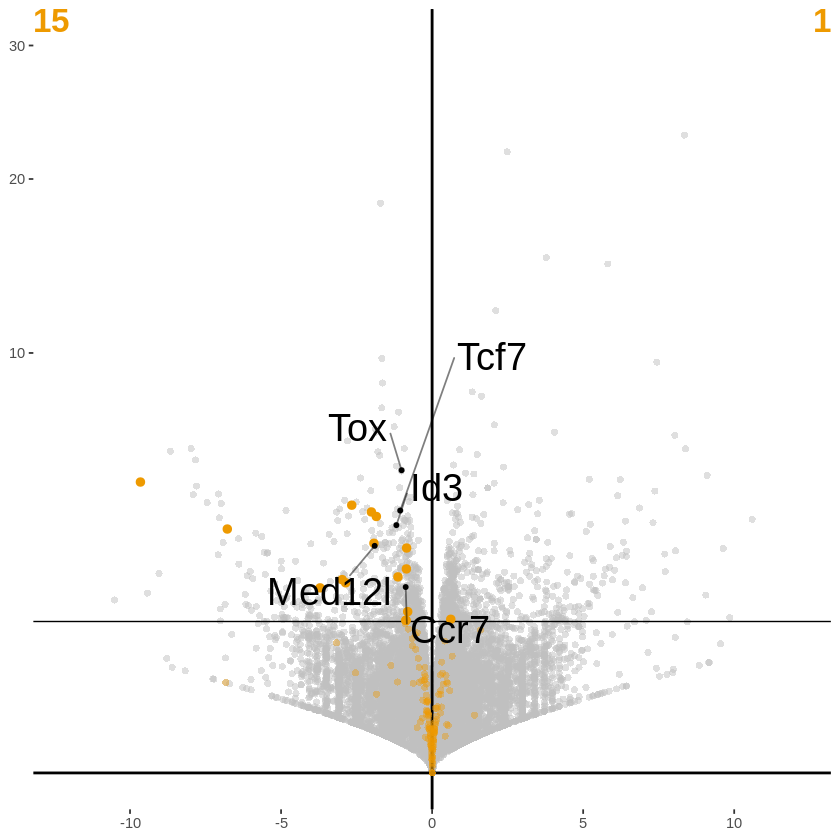

In [28]:
###----- Setup
de.file <- file.path(de.dir, 'KO_EE-WT_EE-Salmon_gn.csv')
outname.base <- "EE-Chd7KO_vs_EE-WT"
use.genes <- c('Med12l','Tcf7','Id3','Tox','Ccr7')
log2fc.c <- 0
nlog10p.c <- 1.3
gs.vec <- c("EE up")
gs.col.vec <- c("orange2")
log2fc.range <- c(-12,12)
nlog10pval.max <- 30

de.df <- read_csv(de.file)
colnames(de.df) <- c('gene_name', 'baseMean', 'log2fc', 'lfcSE', 'stat', 'pvalue','padj','gene_name')
de.df$nlog10pval <- -log10(de.df$pvalue)

# Plot 
vol_plot_out <- volcano_plot_highlightGSEA(de.df, use.genes, gs.vec, gs.col.vec, 
                                           log2fc.c, nlog10p.c,log2fc.range, nlog10pval.max) # With label
vol_plot <- vol_plot_out$labeled_plot
vol_plot
ggsave(paste(outname.base, ".png", sep=""), vol_plot, device='png', width=10, height=10, units='cm')

# Save simplified plot
vol_plot <- vol_plot_out$plot
ggsave(paste(outname.base, "_nolabel.png", sep=""), vol_plot, device='png', width=10, height=10, units='cm')

# Save summary
write_csv(vol_plot_out$sum, paste(outname.base, "_sum.csv", sep=""))